<a href="https://colab.research.google.com/github/joaramirezra/portafolio/blob/main/proyecto_geoimagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import requests
import io
import PIL
from matplotlib import pyplot as plt

# Functions

In [4]:
def preprocess(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  bilateral = cv2.bilateralFilter(img,9,150,75)
  gray_bilateral = cv2.bilateralFilter(gray,9,75,75)
  dinamic_threehold =  cv2.adaptiveThreshold(gray_bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
  # Enmascarada = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return img, gray, bilateral, gray_bilateral,dinamic_threehold
  
def print_images(*images):
  subplots = len(images)

  plt.figure(figsize=(15,5))
  for i,img in enumerate(images) :
    plt.subplot(1,subplots,(i+1))
    plt.imshow(img)
  
  plt.show()

# Load image from url 

In [5]:
response = requests.get("http://www.ehu.eus/mineralogiaoptica/images/cuarzo3xp_gr-06-3-6-5mm--460.jpg")
image_bytes = io.BytesIO(response.content)
img = PIL.Image.open(image_bytes)
img.save("geeks.jpg") 

# Show image recently load 

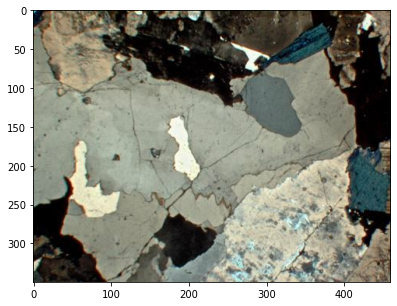

In [6]:
# this is just a test if the img is well readed
img = cv2.imread("geeks.jpg",1)
print_images(img)

# Preproccess evaluation


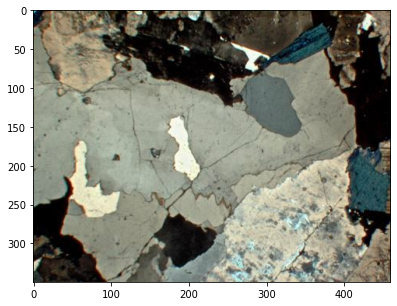

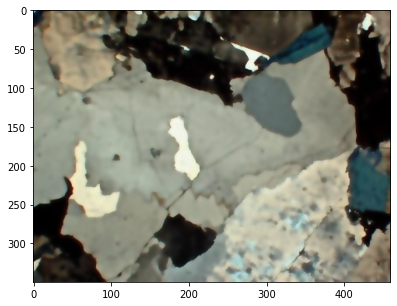

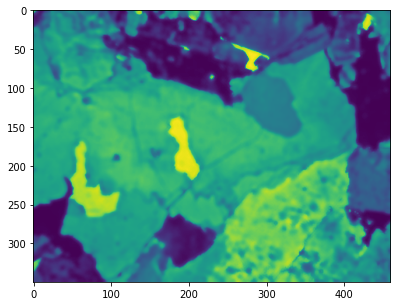

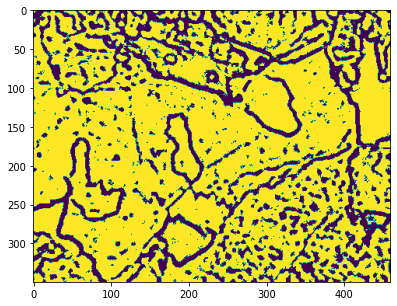

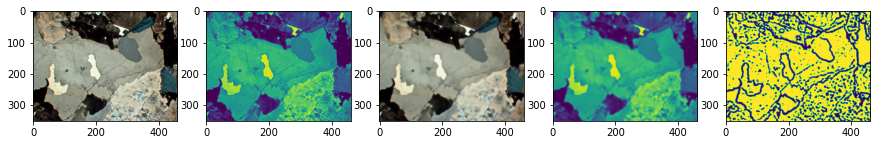

In [7]:
img, gray, bilateral, gray_bilateral,dinamic_threehold = preprocess(img)


print_images(img)
print_images(bilateral)
print_images(gray_bilateral)
print_images(dinamic_threehold)

print_images(img, gray, bilateral, gray_bilateral,dinamic_threehold)

In [25]:
def find_counturs(img):
  img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
  
  edges = cv2.Canny(th2,100,200)

  # contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print(' Number of countours : ' , len(contours))
  # # cv2.drawContours(img2, contours, 0,(250,0,0), 2)
  print_images(img,th2,edges)

pixel diameter =  0


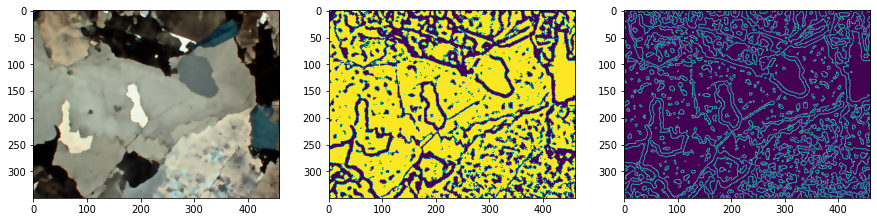

pixel diameter =  1


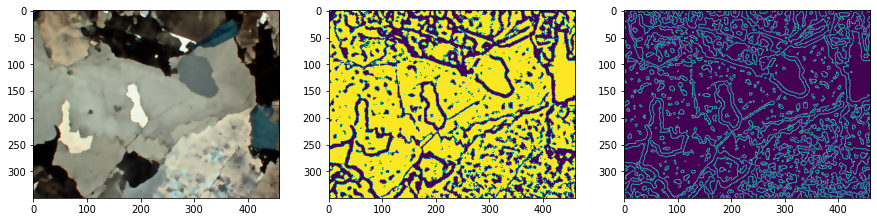

pixel diameter =  2


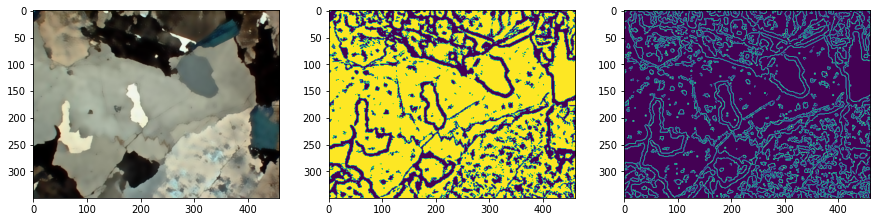

pixel diameter =  3


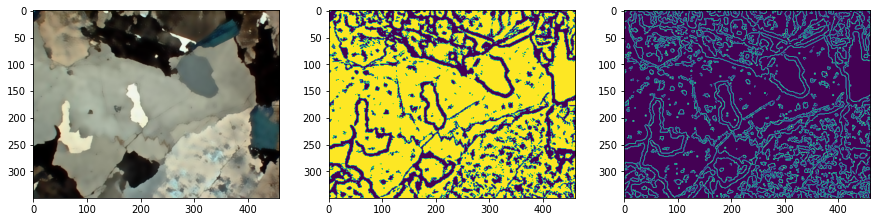

pixel diameter =  4


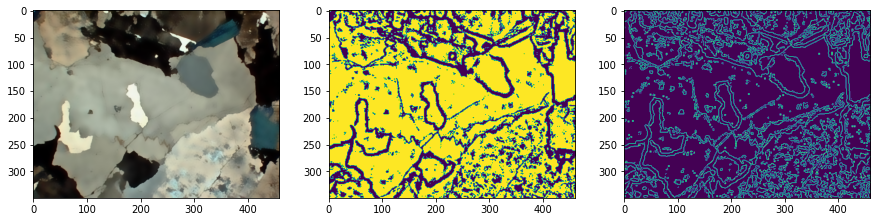

pixel diameter =  5


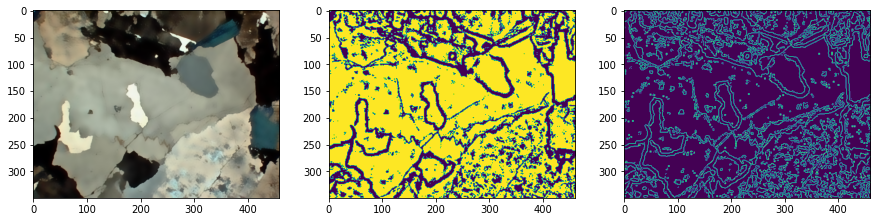

pixel diameter =  6


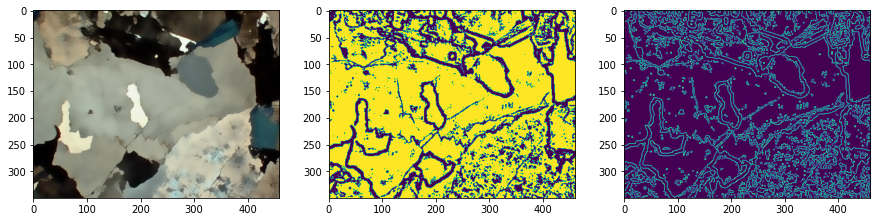

pixel diameter =  7


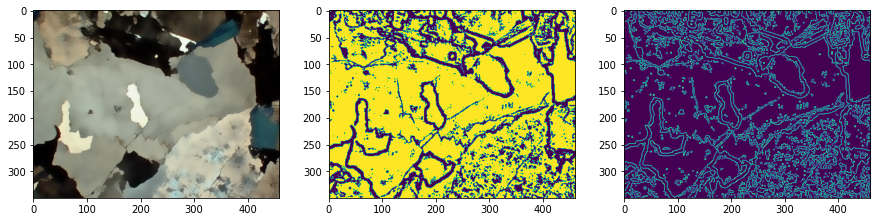

pixel diameter =  8


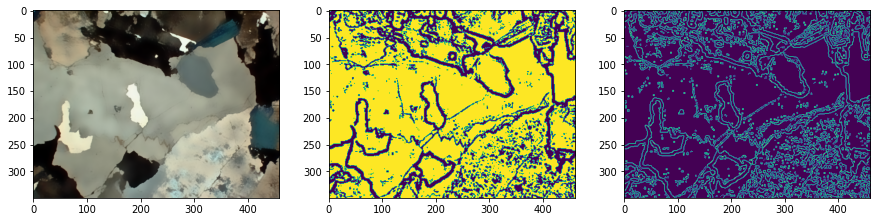

In [26]:
import time 
bilateral =[cv2.bilateralFilter(img,i,100,75) for i in range(10,19)]
for i,bilateral_image in enumerate(bilateral):
  print('pixel diameter = ',i )
  find_counturs(bilateral_image) 
  time.sleep(2)

# bibliografia

- [Mineral grains recognition using computer vision and machine learning](https://www.sciencedirect.com/science/article/pii/S0098300419301037)
- [dentification of Mineral Grains in a Petrographic Thin Section Using Phi- and Max-Images](https://link.springer.com/article/10.1023/B:MATG.0000041179.79093.87)